In [1]:
import pandas as pd

### Data Loading

SQL Query used for gathering the data:

SELECT * from city_data   : saved as "city_data.csv"
<br/> <br/>
SELECT * from city_list   : saved as "city_list.csv"
<br/> <br/>
SELECT * from globla_data: saved as "global_data.csv"

In [2]:
cd = pd.read_csv('./city_data.csv')
cl = pd.read_csv('./city_list.csv')
gd = pd.read_csv('./global_data.csv')

### Check if 'Seoul' is in the data

In [3]:
if 'Seoul' in cd['city'].unique():
    print('Yes')

Yes


### Extract the data that is relevant to 'Seoul'
### Check if there is any 'NaN' data

In [4]:
seoul = cd[cd['city'] == 'Seoul']
### No NaN data
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 58999 to 59173
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      175 non-null    int64  
 1   city      175 non-null    object 
 2   country   175 non-null    object 
 3   avg_temp  175 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


In [5]:
# reset the index
seoul = seoul.reset_index(drop=True)

Moving Average: <br/>
    -smooth out data + easier to observe long term trends + low fluctuation <br/>
    -identify trend direction
<br/><br/>
Large years: smooth out the temperature curve + may eliminate important trend and noise <br/>
Small years: may encounter too many noise that we cannot have an appropriate analysis on the temperature curve
<br/><br/>

I chose the period of 15 for the moving average because it met the both requirement: Smoothing out the curve, eliminating the noise


In [6]:
# Calculating Moving Average Temperature of Seoul (15 years) using rolling() function
period = 15
seoul['MA'] = seoul['avg_temp'].rolling(window=period).mean()
seoul.head(17)

,year,city,country,avg_temp,MA
0,1839,Seoul,South Korea,9.47,NaN
1,1840,Seoul,South Korea,10.21,NaN
2,1841,Seoul,South Korea,9.44,NaN
3,1842,Seoul,South Korea,10.13,NaN
4,1843,Seoul,South Korea,10.33,NaN
5,1844,Seoul,South Korea,10.15,NaN
6,1845,Seoul,South Korea,10.25,NaN
7,1846,Seoul,South Korea,10.57,NaN
8,1847,Seoul,South Korea,10.59,NaN
9,1848,Seoul,South Korea,10.36,NaN


In [7]:
# Calculating Moving Average Temperature of global (15 years) using rolling() function
gd['MA'] = gd['avg_temp'].rolling(window=period).mean()
gd.head(17)

,year,avg_temp,MA
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,NaN


### Get rid of data of the first 14 years  in Seoul because they have 'Nan' value

In [8]:
seoul = seoul[period-1:]

### Seoul has data 1853 ~ 2013
### Extract Global data from 1853 ~ 2013

In [9]:
seoul_year = seoul['year'].unique()

new_gd = pd.DataFrame()
for idx in range(len(gd)):
    if gd['year'][idx] in seoul_year:
        new_gd = new_gd.append(gd.iloc[idx])
new_gd = new_gd[['year', 'avg_temp', 'MA']]
new_gd['year'] = new_gd['year'].astype(int)

In [10]:
# reset index for both seoul and global data frame
seoul = seoul.reset_index(drop=True)
gd = new_gd.reset_index(drop=True)

### Seoul (1853 ~ 2013) and Global (1853 ~ 2013) are now ready
### let's combine the two data into one DataFrame

In [11]:
# add 'type' column for classification
seoul['location'] = 'seoul'
gd['location'] = 'global'

seoul = seoul[['year', 'avg_temp', 'MA', 'location']]
total = pd.concat([seoul, gd])
total.head()

,year,avg_temp,MA,location
0,1853,9.86,10.019333,seoul
1,1854,10.53,10.090000,seoul
2,1855,10.83,10.131333,seoul
3,1856,10.30,10.188667,seoul
4,1857,10.27,10.198000,seoul


### Line plot of Seoul vs Global Temperature (Moving Average)

[Text(0, 0.5, 'Temperature(Celsius)'),
 Text(0.5, 1.0, 'Line plot of Seoul vs Global Temperature (Moving Average)')]

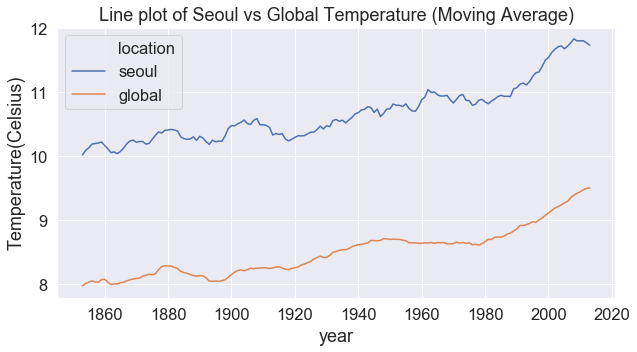

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# use whitegrid style in the graph
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

# use seaborn lineplot
plt1, ax1 = plt.subplots(figsize=(10,5))
sns.lineplot(data = total, x='year', y='MA', hue='location').set(ylabel='Temperature(Celsius)',
                                                             title='Line plot of Seoul vs Global Temperature (Moving Average)')


## Observation

In [13]:
# Statistical indicator for Seoul
total[total['location']=='seoul'].describe()

,year,avg_temp,MA
count,161.000000,161.000000,161.000000
mean,1933.000000,10.741677,10.669085
std,46.620811,0.668088,0.452669
min,1853.000000,9.200000,10.019333
25%,1893.000000,10.280000,10.310000
50%,1933.000000,10.610000,10.561333
75%,1973.000000,11.230000,10.890000
max,2013.000000,12.660000,11.830667


In [14]:
# statistical indicator for Global
total[total['location']=='global'].describe()

,year,avg_temp,MA
count,161.000000,161.000000,161.000000
mean,1933.000000,8.567329,8.501130
std,46.620811,0.458227,0.376923
min,1853.000000,7.560000,7.975333
25%,1893.000000,8.210000,8.191333
50%,1933.000000,8.540000,8.513333
75%,1973.000000,8.770000,8.686000
max,2013.000000,9.730000,9.504000


### My city Seoul is hotter on average compared to the global average. If we look at tables above, the average temperature between 1853 ~ 2013 was 10.67 for seoul and 8.50 for global. This is consistent over the whole period if we look at the graph. This conclusion may have occurred from the fact that  there are more countries with low temperature around the world.

<br/>

### As standard deviation of MA temperature of Seoul is 0.45 and that of global is 0.38, we can also conclude that temperature of Seoul tends to fluctuate more than that of global. It can be also seen in the graph that the line graph of Seoul tends to fluctuate more.

<br/>

### Overall, both Seoul and global showed the gradual increase in the average temperature. And the average temperature increase is getting bigger and bigger as time goes by (as it gets closer to the modern times). This may be the signal of global warming.


<br/>

### It does not apply for the whole period, but the graphs of Seoul and Global tend to follow the similar trend such that when the average temperature of Seoul goes down, that of Global also goes down.

In [ ]:
jupyter nbconvert –to pdf asda.ipynb